# Carga y Limpieza de Datos de Viviendas en Andalucía

Este notebook se encarga del proceso inicial de carga y limpieza de datos del conjunto de datos de viviendas en venta en Andalucía, preparando los datos para análisis posteriores.

## Cargar Librerías y Datos Crudos

Importación de librerías necesarias para el procesamiento de datos y carga del dataset desde el archivo CSV original. Inspección preliminar para verificar la correcta lectura de los datos y la estructura general del DataFrame.

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

In [2]:


# Configuración para visualizaciones
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

# Definir rutas de archivos
data_dir = '../data'
raw_data_dir = os.path.join(data_dir, 'processed')
clean_data_dir = os.path.join(data_dir, 'clean')

# Crear directorio para datos limpios si no existe
if not os.path.exists(clean_data_dir):
    os.makedirs(clean_data_dir)

# Cargar el dataset
try:
    file_path = os.path.join(raw_data_dir, 'andalucia_raw.csv')
    df_raw = pd.read_csv(file_path)
    print(f"Dataset cargado exitosamente desde: {file_path}")
    print(f"Dimensiones del dataset: {df_raw.shape}")
except FileNotFoundError:
    print(f"Error: No se pudo encontrar el archivo en {file_path}")
    df_raw = pd.DataFrame()  # DataFrame vacío para evitar errores en celdas posteriores

Dataset cargado exitosamente desde: ../data\processed\andalucia_raw.csv
Dimensiones del dataset: (213360, 8)


In [3]:
# Mostrar las primeras filas del DataFrame para inspección inicial
if not df_raw.empty:
    print("Primeras 5 filas del conjunto de datos:")
    display(df_raw.head())
else:
    print("El DataFrame está vacío porque no se pudo cargar el archivo.")

Primeras 5 filas del conjunto de datos:


,Price,Property Type,Size (m2),Number of Rooms,Number of Bathrooms,Latitude,Longitude,Location
0,5800.0,countryHouse,168.0,4,1,37.118491,-2.538960,el almendral s/n
1,9000.0,chalet,60.0,2,1,37.353431,-2.298467,calle San Antonio
2,9500.0,chalet,115.0,3,1,37.354983,-2.296607,Olula del Río
3,9900.0,chalet,81.0,3,2,37.038685,-2.744675,"calle Lucero, 3"
4,10000.0,flat,45.0,2,1,36.840707,-2.476512,calle Juan Goytisolo


## Inspección Inicial de Datos Crudos

Análisis preliminar del conjunto de datos: información general, estadísticas descriptivas, dimensiones y tipos de datos. Identificación de posibles problemas como inconsistencias en los tipos de datos o valores que requieren transformación.

In [4]:
# Información general del DataFrame: tipos de datos y valores no nulos
if not df_raw.empty:
    print("Información general del DataFrame:")
    df_raw.info()
else:
    print("El DataFrame está vacío.")

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213360 entries, 0 to 213359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Price                213360 non-null  float64
 1   Property Type        213360 non-null  object 
 2   Size (m2)            213360 non-null  float64
 3   Number of Rooms      213360 non-null  int64  
 4   Number of Bathrooms  213360 non-null  int64  
 5   Latitude             213360 non-null  float64
 6   Longitude            213360 non-null  float64
 7   Location             213360 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 13.0+ MB


In [5]:
# Estadísticas descriptivas
if not df_raw.empty:
    # Estadísticas descriptivas de variables numéricas
    print("\nEstadísticas descriptivas de variables numéricas:")
    display(df_raw.describe())
    
    # Estadísticas descriptivas de variables categóricas
    print("\nEstadísticas descriptivas de variables categóricas:")
    display(df_raw.describe(include=['object']))
else:
    print("El DataFrame está vacío.")


Estadísticas descriptivas de variables numéricas:


,Price,Size (m2),Number of Rooms,Number of Bathrooms,Latitude,Longitude
count,2.133600e+05,213360.000000,213360.000000,213360.000000,213360.000000,213360.000000
mean,7.515792e+05,441.877824,3.770829,2.406529,37.077809,-4.885398
std,1.877872e+06,9431.845459,2.240825,1.945433,0.484112,1.323005
min,3.525000e+03,9.000000,0.000000,0.000000,36.010355,-7.493002
25%,6.200000e+04,89.000000,3.000000,1.000000,36.738566,-5.976372
50%,1.074750e+05,140.000000,3.000000,2.000000,37.164884,-4.959610
75%,5.900000e+05,280.000000,5.000000,3.000000,37.378004,-3.731967
max,3.500000e+07,999999.000000,70.000000,35.000000,38.596052,-1.743577



Estadísticas descriptivas de variables categóricas:


,Property Type,Location
count,213360,213360
unique,6,12985
top,chalet,Centro
freq,109636,1379


Tipos de propiedades y su frecuencia:


Property Type
chalet          109636
flat             71022
countryHouse     22573
penthouse         4829
duplex            3408
studio            1892
Name: count, dtype: int64

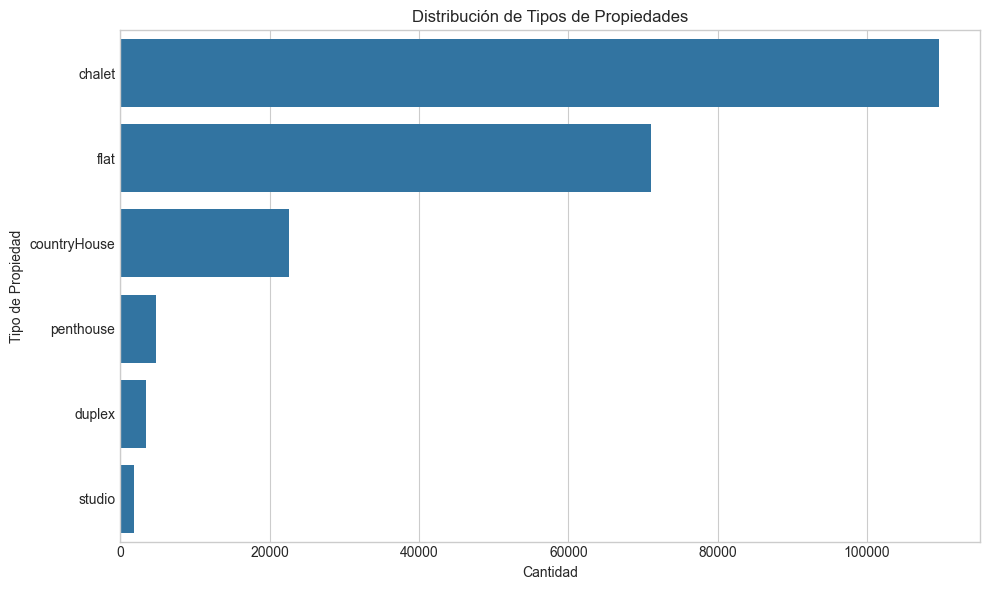

In [6]:
# Verificar los valores únicos en la columna de tipo de propiedad
if not df_raw.empty and 'Property Type' in df_raw.columns:
    property_types = df_raw['Property Type'].value_counts()
    print("Tipos de propiedades y su frecuencia:")
    display(property_types)
    
    # Visualizar la distribución de tipos de propiedades
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_raw['Property Type'], order=property_types.index)
    plt.title('Distribución de Tipos de Propiedades')
    plt.xlabel('Cantidad')
    plt.ylabel('Tipo de Propiedad')
    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame está vacío o no contiene la columna 'Property Type'.")

## Manejo de Valores Nulos y Duplicados

Detección y tratamiento de valores nulos en el dataset mediante técnicas como imputación o eliminación según corresponda. Identificación y eliminación de registros duplicados para garantizar la calidad de los datos.

In [7]:
# Verificar valores nulos en cada columna
if not df_raw.empty:
    missing_values = df_raw.isnull().sum()
    missing_percentage = (df_raw.isnull().sum() / len(df_raw)) * 100
    
    missing_info = pd.DataFrame({
        'Valores Nulos': missing_values,
        'Porcentaje (%)': missing_percentage.round(2)
    })
    
    print("Análisis de valores nulos por columna:")
    display(missing_info[missing_info['Valores Nulos'] > 0])
    
    if missing_info['Valores Nulos'].sum() == 0:
        print("No se encontraron valores nulos en el dataset.")
else:
    print("El DataFrame está vacío.")

Análisis de valores nulos por columna:


,Valores Nulos,Porcentaje (%)


No se encontraron valores nulos en el dataset.


In [8]:
# Verificar registros duplicados
if not df_raw.empty:
    duplicates = df_raw.duplicated().sum()
    print(f"Número de registros duplicados: {duplicates}")
    
    if duplicates > 0:
        # Eliminar duplicados y crear una copia limpia
        df_clean = df_raw.drop_duplicates().reset_index(drop=True)
        print(f"Se eliminaron {duplicates} registros duplicados.")
        print(f"Dimensiones originales: {df_raw.shape}")
        print(f"Dimensiones después de eliminar duplicados: {df_clean.shape}")
    else:
        df_clean = df_raw.copy()
        print("No se encontraron registros duplicados.")
else:
    print("El DataFrame está vacío.")
    df_clean = pd.DataFrame()  # DataFrame vacío para evitar errores

Número de registros duplicados: 188339
Se eliminaron 188339 registros duplicados.
Dimensiones originales: (213360, 8)
Dimensiones después de eliminar duplicados: (25021, 8)


## Limpieza y Transformación de Columnas

Normalización de los nombres de columnas, conversión de tipos de datos, estandarización de unidades y formatos, traducción de columnas al español, y otras transformaciones necesarias para preparar el dataset para análisis posteriores.

In [9]:
# Crear una copia del DataFrame para las transformaciones
if not df_raw.empty:
    # Si ya tenemos df_clean de la celda anterior, usamos ese, si no, creamos una copia
    if 'df_clean' not in locals():
        df_clean = df_raw.copy()
    
    print("Tipos de datos antes de la transformación:")
    print(df_clean.dtypes)
else:
    print("El DataFrame está vacío.")

Tipos de datos antes de la transformación:
Price                  float64
Property Type           object
Size (m2)              float64
Number of Rooms          int64
Number of Bathrooms      int64
Latitude               float64
Longitude              float64
Location                object
dtype: object


In [10]:
# Renombrar columnas al español
if not df_clean.empty:
    # Diccionario de mapeo de nombres en inglés a español
    column_mapping = {
        'Price': 'precio',
        'Property Type': 'tipo_propiedad',
        'Size (m2)': 'superficie',
        'Number of Rooms': 'habitaciones',
        'Number of Bathrooms': 'baños',
        'Latitude': 'latitud',
        'Longitude': 'longitud',
        'Location': 'ubicacion'
    }
    
    # Renombrar columnas
    df_clean = df_clean.rename(columns=column_mapping)
    
    print("Columnas renombradas al español:")
    print(df_clean.columns.tolist())
else:
    print("El DataFrame está vacío.")

Columnas renombradas al español:
['precio', 'tipo_propiedad', 'superficie', 'habitaciones', 'baños', 'latitud', 'longitud', 'ubicacion']


In [11]:
# Traducir y estandarizar valores en la columna tipo_propiedad
if not df_clean.empty and 'tipo_propiedad' in df_clean.columns:
    # Mapeo de tipos de propiedad en inglés a español
    property_type_mapping = {
        'flat': 'piso',
        'chalet': 'chalet',
        'countryHouse': 'casa_rural',
        'duplex': 'duplex',
        'studio': 'estudio',
        'penthouse': 'atico'
    }
    
    # Reemplazar valores
    df_clean['tipo_propiedad'] = df_clean['tipo_propiedad'].map(property_type_mapping).fillna(df_clean['tipo_propiedad'])
    
    print("Valores únicos en la columna tipo_propiedad después de la traducción:")
    print(df_clean['tipo_propiedad'].value_counts())
else:
    print("El DataFrame está vacío o no contiene la columna 'tipo_propiedad'.")

Valores únicos en la columna tipo_propiedad después de la traducción:
tipo_propiedad
chalet        12975
piso           8250
casa_rural     2623
atico           530
duplex          417
estudio         226
Name: count, dtype: int64


In [12]:
# Verificar y tratar valores extremos o inconsistentes en la columna superficie
if not df_clean.empty and 'superficie' in df_clean.columns:
    # Resumen estadístico de la superficie antes de la limpieza
    print("Resumen estadístico de superficie antes de la limpieza:")
    print(df_clean['superficie'].describe())
    
    # Identificar valores extremos (por ejemplo, propiedades con más de 10,000 m²)
    large_properties = df_clean[df_clean['superficie'] > 10000]
    if not large_properties.empty:
        print(f"\nPropiedades con superficie extremadamente grande (>10,000 m²): {len(large_properties)}")
        display(large_properties[['precio', 'tipo_propiedad', 'superficie', 'habitaciones', 'ubicacion']])
        
        # Opción para filtrar o corregir estos valores
        # Aquí podríamos decidir eliminarlos o ajustarlos según el caso
        df_clean = df_clean[df_clean['superficie'] <= 10000]
        print(f"Se filtraron propiedades con superficie > 10,000 m²")
    
    # Verificar valores negativos o cero en superficie
    invalid_surface = df_clean[(df_clean['superficie'] <= 0)]
    if not invalid_surface.empty:
        print(f"\nPropiedades con superficie inválida (<=0 m²): {len(invalid_surface)}")
        df_clean = df_clean[df_clean['superficie'] > 0]
        print(f"Se eliminaron propiedades con superficie inválida")
    
    print("\nResumen estadístico de superficie después de la limpieza:")
    print(df_clean['superficie'].describe())
else:
    print("El DataFrame está vacío o no contiene la columna 'superficie'.")

Resumen estadístico de superficie antes de la limpieza:
count     25021.000000
mean        497.728820
std       10395.217756
min           9.000000
25%          89.000000
50%         141.000000
75%         300.000000
max      999999.000000
Name: superficie, dtype: float64

Propiedades con superficie extremadamente grande (>10,000 m²): 46


,precio,tipo_propiedad,superficie,habitaciones,ubicacion
34,17000.0,casa_rural,38782.0,0,Albox
1208,52000.0,casa_rural,30000.0,1,Vélez Rubio
1364,55000.0,casa_rural,55000.0,0,Albox
1423,56000.0,casa_rural,26356.0,1,Canjayar
2582,65000.0,chalet,110000.0,4,"calle Maestro Amado, 120"
4012,9028639.0,chalet,35234.0,1,calle de Carretera Cobre
4150,4400000.0,chalet,83820.0,7,calle Grazalema
4385,2250000.0,chalet,74405.0,5,calle Genal
4582,1550000.0,chalet,14046.0,10,La Granja - La Colina - Los Pastores
5138,856720.0,chalet,57568.0,1,plaza U.E.T.C 2


Se filtraron propiedades con superficie > 10,000 m²

Resumen estadístico de superficie después de la limpieza:
count    24975.000000
mean       264.617209
std        379.903055
min          9.000000
25%         89.000000
50%        141.000000
75%        297.000000
max      10000.000000
Name: superficie, dtype: float64


In [13]:
# Verificar y tratar valores extremos o inconsistentes en la columna precio
if not df_clean.empty and 'precio' in df_clean.columns:
    # Resumen estadístico del precio antes de la limpieza
    print("Resumen estadístico de precio antes de la limpieza:")
    print(df_clean['precio'].describe())
    
    # Identificar valores extremadamente bajos o altos
    low_price = df_clean[df_clean['precio'] < 1000]
    if not low_price.empty:
        print(f"\nPropiedades con precio extremadamente bajo (<1,000 €): {len(low_price)}")
        display(low_price[['precio', 'tipo_propiedad', 'superficie', 'habitaciones', 'ubicacion']].head())
        
    high_price = df_clean[df_clean['precio'] > 1000000]
    if not high_price.empty:
        print(f"\nPropiedades con precio extremadamente alto (>1,000,000 €): {len(high_price)}")
        display(high_price[['precio', 'tipo_propiedad', 'superficie', 'habitaciones', 'ubicacion']].head())
    
    # Opción: filtrar valores extremos
    # df_clean = df_clean[(df_clean['precio'] >= 1000) & (df_clean['precio'] <= 1000000)]
    
    # Otra opción: considerar el rango intercuartílico para detectar outliers
    Q1 = df_clean['precio'].quantile(0.25)
    Q3 = df_clean['precio'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\nLímite inferior para outliers (Q1 - 1.5*IQR): {lower_bound}")
    print(f"Límite superior para outliers (Q3 + 1.5*IQR): {upper_bound}")
    
    outliers = df_clean[(df_clean['precio'] < lower_bound) | (df_clean['precio'] > upper_bound)]
    print(f"\nNúmero de outliers según método IQR: {len(outliers)}")
    
    # En este caso, podríamos decidir conservar los outliers para el análisis exploratorio
    # y tomar decisiones sobre su tratamiento más adelante
    print("\nNo se eliminarán outliers de precio en esta etapa, se considerarán en el análisis exploratorio.")
else:
    print("El DataFrame está vacío o no contiene la columna 'precio'.")

Resumen estadístico de precio antes de la limpieza:
count    2.497500e+04
mean     9.291314e+05
std      2.245300e+06
min      3.525000e+03
25%      6.400000e+04
50%      1.099950e+05
75%      5.980000e+05
max      3.500000e+07
Name: precio, dtype: float64

Propiedades con precio extremadamente alto (>1,000,000 €): 3592


,precio,tipo_propiedad,superficie,habitaciones,ubicacion
3991,22500000.0,casa_rural,4322.0,9,Barrio La Reserva
3992,22500000.0,chalet,4232.0,9,Barrio La Reserva
3993,18000000.0,chalet,3850.0,18,Barrio Zona F
3994,18000000.0,chalet,280.0,3,Sotogrande Costa
3995,15000000.0,chalet,2100.0,7,calle Grazalema s/n



Límite inferior para outliers (Q1 - 1.5*IQR): -737000.0
Límite superior para outliers (Q3 + 1.5*IQR): 1399000.0

Número de outliers según método IQR: 3032

No se eliminarán outliers de precio en esta etapa, se considerarán en el análisis exploratorio.


In [14]:
# Crear variables derivadas útiles
if not df_clean.empty:
    # Precio por metro cuadrado (€/m²)
    if 'precio' in df_clean.columns and 'superficie' in df_clean.columns:
        df_clean['precio_m2'] = df_clean['precio'] / df_clean['superficie']
        print("Se creó la columna precio_m2 (precio por metro cuadrado)")
        
        # Resumen estadístico del precio por metro cuadrado
        print("\nEstadísticas de precio por metro cuadrado (€/m²):")
        print(df_clean['precio_m2'].describe())
        
        # Eliminar valores extremos o inconsistentes en precio_m2
        extreme_price_m2 = df_clean[(df_clean['precio_m2'] > 10000) | (df_clean['precio_m2'] < 10)]
        if not extreme_price_m2.empty:
            print(f"\nPropiedades con precio por m² extremo (<10 € o >10,000 €): {len(extreme_price_m2)}")
            df_clean = df_clean[(df_clean['precio_m2'] >= 10) & (df_clean['precio_m2'] <= 10000)]
            print(f"Se filtraron propiedades con precio por m² extremo")
    
    # Ratio habitaciones/superficie
    if 'habitaciones' in df_clean.columns and 'superficie' in df_clean.columns:
        df_clean['densidad_habitaciones'] = df_clean['habitaciones'] / df_clean['superficie']
        print("\nSe creó la columna densidad_habitaciones (ratio habitaciones/superficie)")
    
    print("\nColumnas finales del DataFrame:")
    print(df_clean.columns.tolist())
    
    # Mostrar las primeras filas del DataFrame después de las transformaciones
    print("\nPrimeras filas del DataFrame después de las transformaciones:")
    display(df_clean.head())
else:
    print("El DataFrame está vacío.")

Se creó la columna precio_m2 (precio por metro cuadrado)

Estadísticas de precio por metro cuadrado (€/m²):
count    24975.000000
mean      2293.978578
std       3568.393117
min          4.500000
25%        610.526316
50%       1141.176471
75%       2525.381365
max      81893.004115
Name: precio_m2, dtype: float64

Propiedades con precio por m² extremo (<10 € o >10,000 €): 868
Se filtraron propiedades con precio por m² extremo

Se creó la columna densidad_habitaciones (ratio habitaciones/superficie)

Columnas finales del DataFrame:
['precio', 'tipo_propiedad', 'superficie', 'habitaciones', 'baños', 'latitud', 'longitud', 'ubicacion', 'precio_m2', 'densidad_habitaciones']

Primeras filas del DataFrame después de las transformaciones:


,precio,tipo_propiedad,superficie,habitaciones,baños,latitud,longitud,ubicacion,precio_m2,densidad_habitaciones
0,5800.0,casa_rural,168.0,4,1,37.118491,-2.538960,el almendral s/n,34.523810,0.023810
1,9000.0,chalet,60.0,2,1,37.353431,-2.298467,calle San Antonio,150.000000,0.033333
2,9500.0,chalet,115.0,3,1,37.354983,-2.296607,Olula del Río,82.608696,0.026087
3,9900.0,chalet,81.0,3,2,37.038685,-2.744675,"calle Lucero, 3",122.222222,0.037037
4,10000.0,piso,45.0,2,1,36.840707,-2.476512,calle Juan Goytisolo,222.222222,0.044444


## Guardar Datos Limpios en CSV

Almacenamiento del DataFrame procesado y limpio en un nuevo archivo CSV para su uso en análisis posteriores y modelado.

In [15]:
# Guardar el DataFrame limpio en un archivo CSV
if not df_clean.empty:
    # Generar nombre de archivo con timestamp para evitar sobreescritura
    timestamp = datetime.now().strftime("%Y%m%d")
    clean_file_path = os.path.join(clean_data_dir, f'andalucia_clean_{timestamp}.csv')
    
    # Guardar el archivo
    df_clean.to_csv(clean_file_path, index=False)
    print(f"Dataset limpio guardado exitosamente en: {clean_file_path}")
    print(f"Dimensiones del dataset limpio: {df_clean.shape}")
    
    # También guardar una versión sin timestamp para facilitar referencias en otros notebooks
    standard_clean_path = os.path.join(clean_data_dir, 'andalucia_clean.csv')
    df_clean.to_csv(standard_clean_path, index=False)
    print(f"Dataset limpio también guardado como: {standard_clean_path}")
else:
    print("El DataFrame está vacío. No se puede guardar.")

Dataset limpio guardado exitosamente en: ../data\clean\andalucia_clean_20250516.csv
Dimensiones del dataset limpio: (24107, 10)
Dataset limpio también guardado como: ../data\clean\andalucia_clean.csv


## Resumen del Proceso de Limpieza

A continuación se presenta un resumen de las transformaciones realizadas:

1. **Carga de datos**: Se cargó el dataset original `andalucia_raw.csv`.
2. **Manejo de duplicados**: Se identificaron y eliminaron registros duplicados.
3. **Traducción de columnas**: Se tradujeron los nombres de columnas del inglés al español.
4. **Estandarización de tipos de propiedades**: Se tradujeron y normalizaron los tipos de propiedades.
5. **Tratamiento de valores extremos**: 
   - Se identificaron y filtraron propiedades con superficies extremadamente grandes.
   - Se identificaron outliers en precios usando el método IQR, pero se mantuvieron para análisis posteriores.
6. **Creación de variables derivadas**:
   - Se calculó el precio por metro cuadrado (`precio_m2`)
   - Se calculó la densidad de habitaciones (`densidad_habitaciones`)
7. **Guardado de datos limpios**: El dataset procesado se guardó en la carpeta `data/clean/`.

El dataset está ahora listo para su análisis exploratorio y modelado.